## Descriptive Analysis

In [1]:
import numpy as np
import pandas as pd
import os

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import dexplot as dxp
sns.set()
#matplotlib.rc('font', family='sans-serif') 

NameError: name 'matplotlib' is not defined

In [3]:
projectFolder = 'E:/analytics/projects/statistics/data/'
fileName = 'fake_insta_updated.csv'
df = pd.read_csv(projectFolder + fileName)
df.shape

(120, 7)

In [4]:
#missing values
df.isna().sum()

has_a_profile_pic          0
number_of_words_in_name    0
num_characters_in_bio      0
number_of_posts            0
number_of_followers        0
number_of_follows          0
account_type               0
dtype: int64

In [5]:
df.dtypes

has_a_profile_pic          object
number_of_words_in_name     int64
num_characters_in_bio       int64
number_of_posts             int64
number_of_followers         int64
number_of_follows          object
account_type               object
dtype: object

In [7]:
df['number_of_follows'].nunique()
#how many unique values

109

In [8]:
df['number_of_follows'].unique()
#errors - "Don't know/Refused (VOL.)", -> convert to missing values

array(['604', '6', '668', '7369', '356', '424', '254', '521', '143',
       '358', '492', '436', '437', '622', '141', '337', '499', '605',
       '199', '694', '276', "Don't know/Refused (VOL.)", '367', '157',
       '545', '138', '1395', '490', '347', '5514', '552', '573', '963',
       '449', '562', '346', '151', '148', '3504', '185', '293', '549',
       '466', '993', '1111', '40', '1055', '482', '47', '274', '223',
       '363', '568', '535', '577', '474', '505', '2', '64', '30', '82',
       '124', '25', '33', '34', '38', '18', '1', '15', '22', '353', '24',
       '2287', '6153', '31', '250', '6172', '2129', '324', '126', '350',
       '764', '3239', '920', '105', '58', '55', '175', '202', '636', '72',
       '7453', '162', '829', '776', '942', '1445', '4239', '1381', '669',
       '235', '7', '270', '76', '811', '164', '3572', '1695', '68'],
      dtype=object)

In [9]:
missing_values = ["Don't know/Refused (VOL.)"]

In [10]:
df = pd.read_csv(projectFolder + fileName, na_values = missing_values)
df.shape

(120, 7)

In [11]:
df['number_of_follows'].unique()

array([6.040e+02, 6.000e+00, 6.680e+02, 7.369e+03, 3.560e+02, 4.240e+02,
       2.540e+02, 5.210e+02, 1.430e+02, 3.580e+02, 4.920e+02, 4.360e+02,
       4.370e+02, 6.220e+02, 1.410e+02, 3.370e+02, 4.990e+02, 6.050e+02,
       1.990e+02, 6.940e+02, 2.760e+02,       nan, 3.670e+02, 1.570e+02,
       5.450e+02, 1.380e+02, 1.395e+03, 4.900e+02, 3.470e+02, 5.514e+03,
       5.520e+02, 5.730e+02, 9.630e+02, 4.490e+02, 5.620e+02, 3.460e+02,
       1.510e+02, 1.480e+02, 3.504e+03, 1.850e+02, 2.930e+02, 5.490e+02,
       4.660e+02, 9.930e+02, 1.111e+03, 4.000e+01, 1.055e+03, 4.820e+02,
       4.700e+01, 2.740e+02, 2.230e+02, 3.630e+02, 5.680e+02, 5.350e+02,
       5.770e+02, 4.740e+02, 5.050e+02, 2.000e+00, 6.400e+01, 3.000e+01,
       8.200e+01, 1.240e+02, 2.500e+01, 3.300e+01, 3.400e+01, 3.800e+01,
       1.800e+01, 1.000e+00, 1.500e+01, 2.200e+01, 3.530e+02, 2.400e+01,
       2.287e+03, 6.153e+03, 3.100e+01, 2.500e+02, 6.172e+03, 2.129e+03,
       3.240e+02, 1.260e+02, 3.500e+02, 7.640e+02, 

In [12]:
df.dtypes

has_a_profile_pic           object
number_of_words_in_name      int64
num_characters_in_bio        int64
number_of_posts              int64
number_of_followers          int64
number_of_follows          float64
account_type                object
dtype: object

In [13]:
df.isna().sum()

has_a_profile_pic          0
number_of_words_in_name    0
num_characters_in_bio      0
number_of_posts            0
number_of_followers        0
number_of_follows          2
account_type               0
dtype: int64

In [14]:
#Drop missing values
df.dropna(inplace=True)
df.isna().sum()

has_a_profile_pic          0
number_of_words_in_name    0
num_characters_in_bio      0
number_of_posts            0
number_of_followers        0
number_of_follows          0
account_type               0
dtype: int64

In [15]:
df.shape

(118, 7)

In [16]:
# Visualisation

In [33]:
def mySummary(series):
    index = ['min','Q1', 'med','Q3', 'mean', 'max','std', 'IQR']
    value = [ series.min(),
            series.quantile(q=.25),
            series.median(),
            series.quantile(q=.75),
            series.mean(),
            series.max(),
            series.std(),
            series.quantile(q=.75) - series.quantile(q=.25)]
    return pd.DataFrame({'value': value}, index=index)

In [34]:
mySummary(df['number_of_follows'])

,value
min,1.000000
Q1,109.750000
med,354.500000
Q3,660.000000
mean,783.889831
max,7453.000000
std,1420.163087
IQR,550.250000


In [35]:
df[['number_of_follows','account_type']][df['account_type'] == 'fake'].head()

,number_of_follows,account_type
60,2.0,fake
61,64.0,fake
62,30.0,fake
63,694.0,fake
64,82.0,fake


In [36]:
# for fake accounts
mySummary(df['number_of_follows'][df['account_type'] == 'fake'])

,value
min,1.000000
Q1,33.000000
med,163.000000
Q3,784.750000
mean,853.933333
max,7453.000000
std,1607.370923
IQR,751.750000


In [37]:
# for real accounts
mySummary(df['number_of_follows'][df['account_type'] == 'real'])

,value
min,6.000000
Q1,276.000000
med,470.000000
Q3,576.000000
mean,711.431034
max,7369.000000
std,1206.264905
IQR,300.000000


(0.0, 771.2)

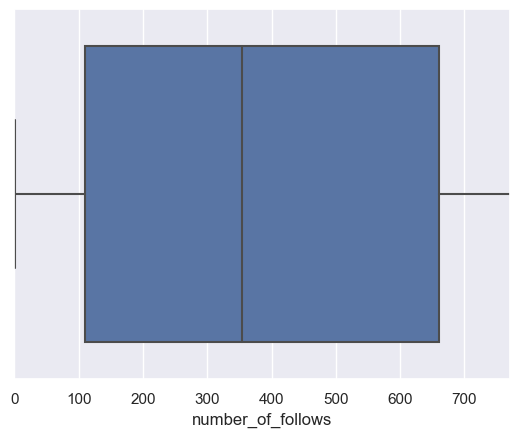

In [72]:
# Box Plots
y_values = df['number_of_follows'].values
ax = sns.boxplot(x='number_of_follows', data=df, fliersize=0)
ax.set_xlim([0,df['number_of_follows'].quantile(q=.8)])

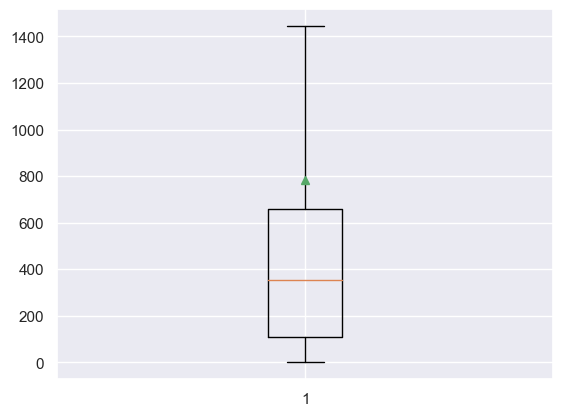

In [93]:
plt.boxplot(df['number_of_follows'], notch=False, autorange=True, showfliers=False, showmeans=True)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\dexplot\_common_plot.py:156: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  self.data[name].cat.remove_unused_categories(inplace=True)


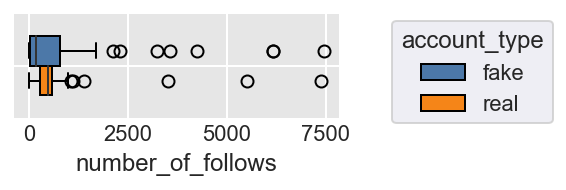

<Figure size 2000x1000 with 0 Axes>

In [76]:
plt.figure(figsize=(20,10))
dxp.box(data= df, x='number_of_follows', split='account_type')
#ax.set_xlim([0,df['number_of_follows'].quantile(q=.8)])

<Axes: >

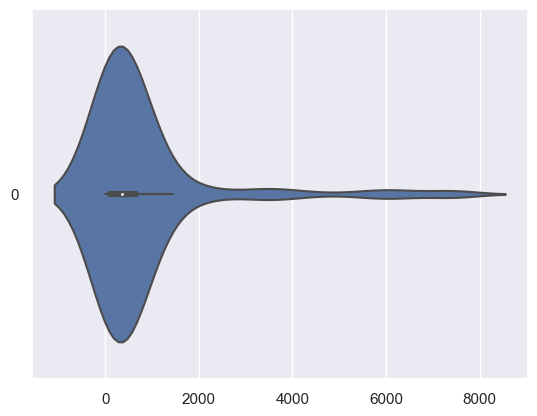

In [78]:
# Violin Plot
sns.violinplot(df['number_of_follows'], orient='h')

In [107]:
sum1 = df['account_type'].value_counts().reset_index().rename(columns={'index':'account_type','account_type':'count'})
sum1

,account_type,count
0,fake,60
1,real,58


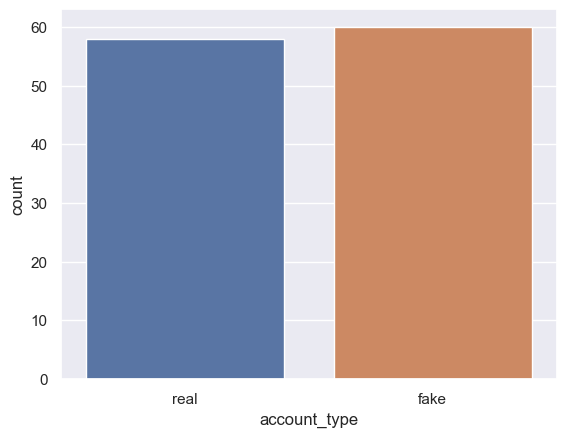

In [102]:
sns.countplot(data=df , x='account_type')
plt.show()

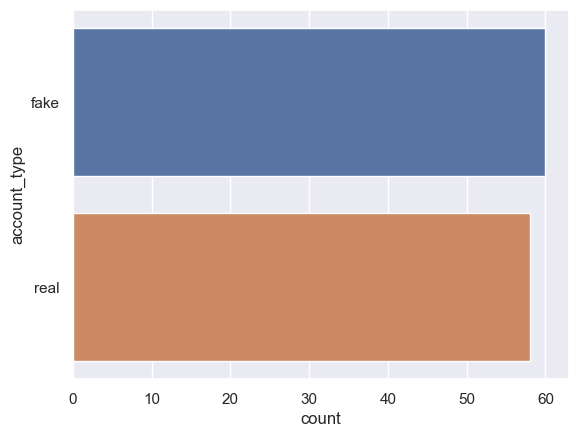

In [110]:
sns.barplot(data=sum1 , x='count', y='account_type')
plt.show()